# 🎉 **HELLO** 🎉  
## Welcome to My First Task at **Saiket System**! 🚀  



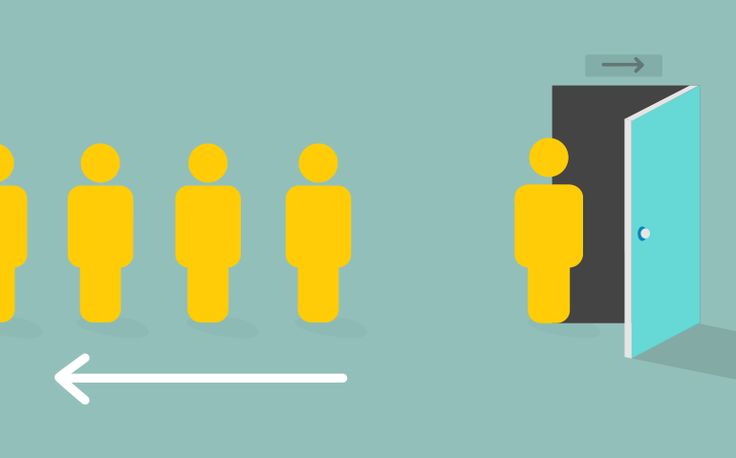

In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Load data
df = pd.read_csv(r"/content/Telco_Customer_Churn_Dataset  (1).csv")

# Display the first 5 rows
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
# Check missing values and DataFrame information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
# Check the number of missing values in each column
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [8]:
# Check for duplicate rows
duplicates = df.duplicated()

# Count the number of duplicate rows
num_duplicates = duplicates.sum()

print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 0


In [9]:
# Display unique values for each column
for column in df.columns[1:]:
    unique_values = df[column].unique()
    print(f"Column: {column}")
    print(unique_values)
    print("-" * 50)

Column: gender
['Female' 'Male']
--------------------------------------------------
Column: SeniorCitizen
[0 1]
--------------------------------------------------
Column: Partner
['Yes' 'No']
--------------------------------------------------
Column: Dependents
['No' 'Yes']
--------------------------------------------------
Column: tenure
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
--------------------------------------------------
Column: PhoneService
['No' 'Yes']
--------------------------------------------------
Column: MultipleLines
['No phone service' 'No' 'Yes']
--------------------------------------------------
Column: InternetService
['DSL' 'Fiber optic' 'No']
--------------------------------------------------
Column: OnlineSecurity
['No' 'Yes' 'No internet service']
----------------------------------

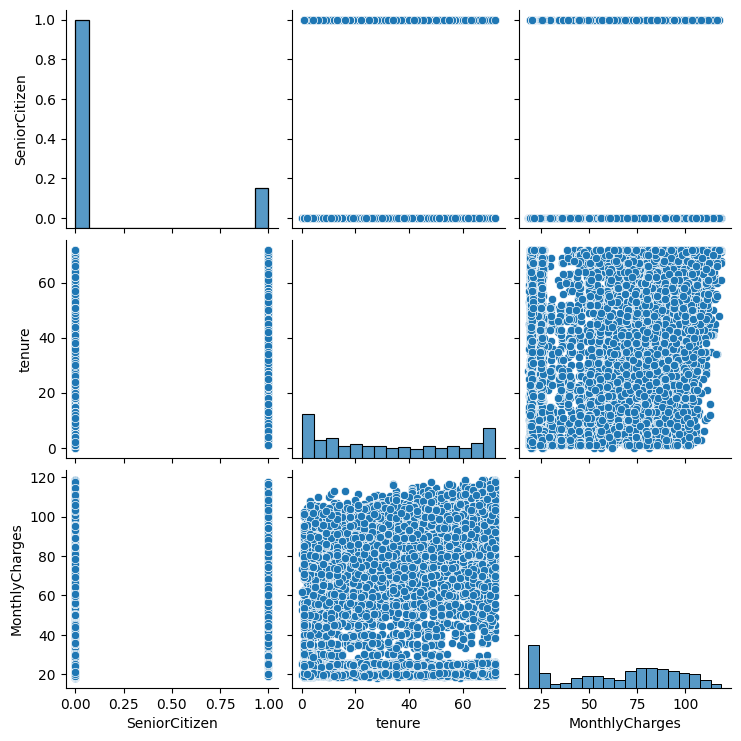

In [10]:
# Select only numerical columns for the pair plot
numerical_columns = df.select_dtypes(include=['int64', 'float64'])

# Create a pair plot
sns.pairplot(numerical_columns)

# Display the plot
plt.show()

In [11]:
from sklearn.preprocessing import OneHotEncoder

# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, drop='first')  # drop='first' to avoid multicollinearity

# Select categorical columns
categorical_columns = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
                       'PaperlessBilling', 'PaymentMethod', 'Churn']

# Fit and transform the data
encoded_data = encoder.fit_transform(df[categorical_columns])

# Convert the encoded data into a DataFrame
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_columns))

# Drop the original categorical columns and concatenate the encoded ones
df_encoded = pd.concat([df.drop(columns=categorical_columns), encoded_df], axis=1)

# Display the first 5 rows of the encoded DataFrame
df_encoded.head()

,customerID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,7590-VHVEG,0,1,29.85,29.85,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,5575-GNVDE,0,34,56.95,1889.5,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,3668-QPYBK,0,2,53.85,108.15,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
3,7795-CFOCW,0,45,42.30,1840.75,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,9237-HQITU,0,2,70.70,151.65,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


In [13]:
# Save the encoded DataFrame to a CSV file
encoded_file_path = r"C:\Users\Alshuruq Company\Desktop\Saiket\Telco_Customer_Churn_Encoded.csv"
df_encoded.to_csv(encoded_file_path, index=False)

print(f"Encoded CSV file saved successfully at: {encoded_file_path}")

Encoded CSV file saved successfully at: C:\Users\Alshuruq Company\Desktop\Saiket\Telco_Customer_Churn_Encoded.csv
